# El perceptrón simple

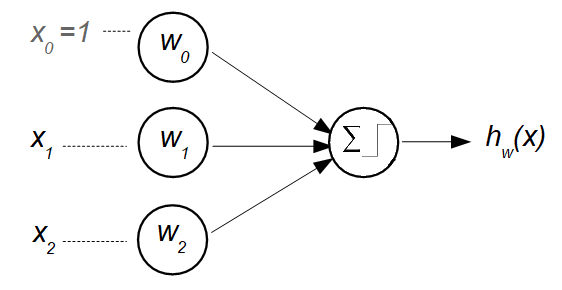

Cada una de las entradas está asociada a un peso y se introduce en la unidad logística. Además, agregamos una característica de sesgo, x0 = 1. 

La unidad logística consta de dos elementos: una función para sumar entradas y una función de activación. Si usamos la sigmoide como función de activación, entonces podemos escribir la siguiente ecuación:

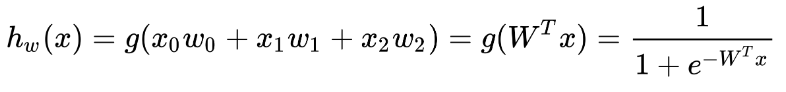

Esta es exactamente la hipótesis que usamos para la regresión logística, pero en este caso cambiamos theta por w para indicar los pesos en la unidad logística. Estos pesos son equivalentes a los parámetros del modelo de regresión logística. 

Para crear una red neuronal, conectamos varias unidades logísticas en capas. El siguiente diagrama representa una red neuronal de tres capas (para mayor claridad, omitimos la unidad de sesgo):

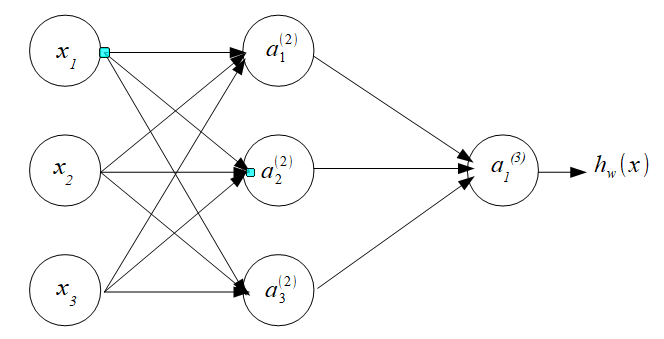

Esta ANN tan sencilla consta de:
- Una capa de entrada con tres unidades
- Una capa oculta, también con tres unidades
- Una capa de salida con una sola unidad 

Usamos la notación ai(j) para referirnos a la activación de la unidad i en la capa j, mientras que W(j) denota la matriz de pesos que mapea la capa j a la capa j+1. Usando esta notación, podemos expresar la activación de las tres unidades ocultas con las siguientes ecuaciones:

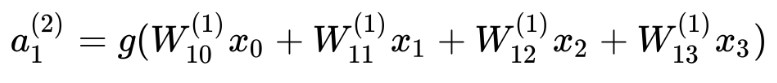

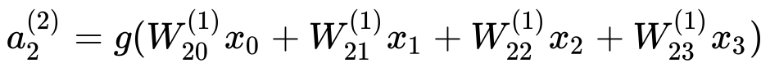

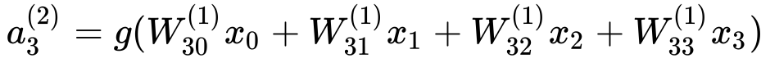

La activación de la unidad de salida se puede expresar mediante la siguiente ecuación:

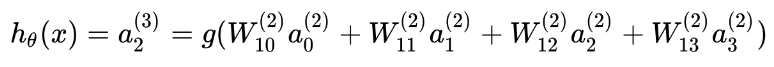

Aquí, W(1) es una matriz de dimensiones 3x4 que controla el mapeo de funciones entre la entrada (primera capa) y la capa oculta única (segunda capa). 

La matriz de pesos X(2), de tamaño 1x3, controla el mapeo entre la capa oculta y la capa de salida, H. 

De manera más general, una red con unidades s_j en la capa j y s_k unidades en la capa j+1 tendrá un tamaño de s_k por (s_j)+1. Por ejemplo, para una red que tiene cinco unidades de entrada y tres unidades en la siguiente capa directa (segunda capa), la matriz de pesos asociada, W(1), será de tamaño 3x6.

Habiendo establecido una función de hipótesis, el siguiente paso es formular una función de coste para medir, y finalmente minimizar, el error del modelo. Para la clasificación, la función de coste es casi idéntica a la utilizada para la regresión logística. La diferencia clave es que, en el caso de las redes neuronales, podemos agregar unidades de salida para permitir la clasificación de clases múltiples. Es decir, podemos escribir la función de coste para múltiples salidas de la siguiente manera:

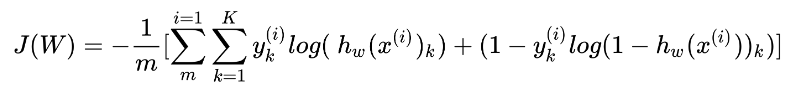

En este caso, K es el número de unidades de salida, que es equivalente al número de clases.

Finalmente, necesitamos minimizar la función de coste, lo que se lleva a cabo utilizando el algoritmo de *backpropagation* (retropropagación). Esencialmente, el proceso consiste en retropropagar el error, el gradiente de la función de coste, desde las unidades de salida hasta las unidades de entrada. Para ello, es necesario evaluar las derivadas parciales. Es decir, es necesario realizar el siguiente cálculo:

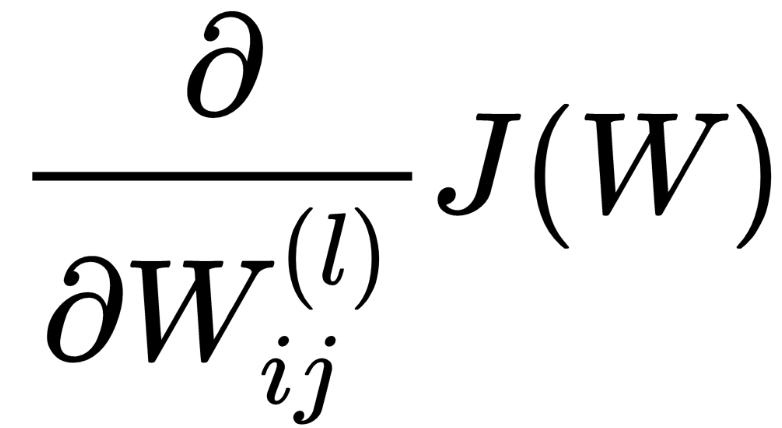

Aquí, l es la capa, j es la unidad e i es la muestra. En otras palabras, para cada unidad en cada capa, y para cada muestra, necesitamos calcular la derivada parcial (el gradiente) de la función de coste con respecto a cada parámetro. Por ejemplo, si tenemos una red con cuatro capas y estamos trabajando con una sola muestra,  necesitamos encontrar el error en cada capa, comenzando en la salida. El error en la salida es solo el error de la hipótesis:

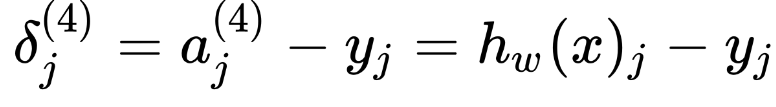

Este es un vector del error para cada unidad, j. El superíndice (4) indica que esta es la cuarta capa, es decir, la capa de salida. El error de las dos capas ocultas se puede calcular con las siguientes ecuaciones:

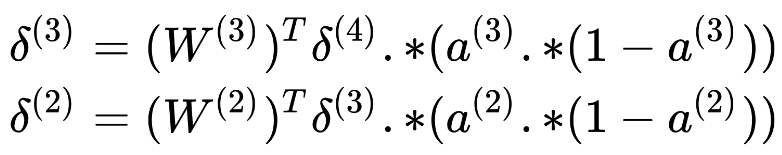

El operador * se refiere a la multiplicación de vectores por elementos. 

Se requiere el vector de error de la siguiente capa directa en cada una de estas ecuaciones. Es decir, para calcular el error en la capa tres, se requiere el vector de error de la capa de salida. De manera similar, para calcular el error en la capa dos se requiere el vector de error de la capa tres.

Así es como funciona la retropropagación con una sola muestra. Para recorrer un conjunto de datos completo, necesitamos acumular los gradientes para cada unidad y cada muestra. Entonces, para cada muestra en el conjunto de entrenamiento, la red neuronal realiza una propagación hacia adelante para calcular la activación de las capas ocultas y la capa de salida. Luego, para la misma muestra, que está dentro del mismo bucle, se puede calcular el error de salida. En consecuencia, podemos calcular el error para cada capa anterior a su vez, y la red neuronal hace exactamente esto, acumulando cada gradiente en una matriz. El ciclo comienza de nuevo a realizar el mismo conjunto de operaciones en la siguiente muestra, y estos gradientes también se acumulan en la matriz de errores. Podemos escribir una regla de actualización de la siguiente manera:

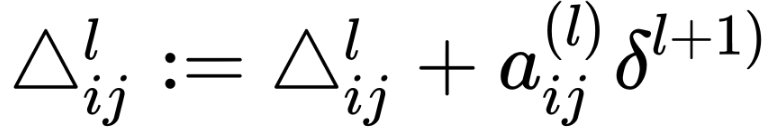

El símbolo delta hace referencia a la matriz que almacena los gradientes acumulados sumando la activación para la capa l, la unidad j y la muestra i, y multiplicándola después por el error asociado de la siguiente capa hacia adelante para esta misma muestra, i. Finalmente, una vez que hemos pasado por todo el conjunto de entrenamiento (es decir, hemos completado una *epoch*), podemos calcular la derivada de la función de coste con respecto a cada parámetro:

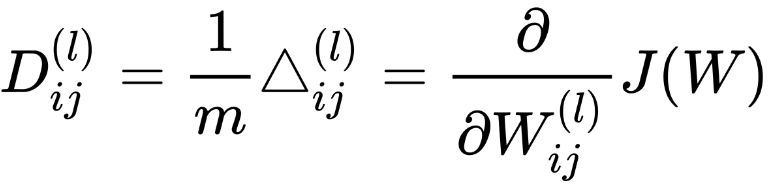

# Modelos benchmark

## Modelo de referencia 1

El siguiente modelo es el más común y se considera la plantilla más simple para resolver el problema del dataset MNIST:

In [ ]:
import torch
import torch.nn as nn

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.lin1 = nn.Linear(784, 100)
        self.relu = nn.ReLu()
        self.lin2 = nn.Linear(100, 10)
        
    def forward(self, x):
        out = self.lin1(x)
        out = self.relu(out)
        out = self.lin2(out)
        return out
    
model1 = Model1()

En este modelo tan básico, inicializamos cada capa con su método *init*, creando una variable de clase que se asigna a un objeto *nn* de PyTorch.

Inicializamos dos funciones lineales y una función ReLu. La función nn.Linear toma una entrada de tamaño 28 * 28, o lo que es lo mismo, 784. Este es, por tanto, el tamaño de cada una de las imágenes de entrada.

Los canales de salida o el ancho de la red se establece en 100. Este número puede fijarse de otras formas y, en general, se podría decir que un número mayor dará como resultado un mejor rendimiento.

En el método forward, se crea una variable *out*, la cual se pasa a través de una secuencia ordenada compuesta por una función lineal, una ReLu y otra función lineal. Esta se considera una arquitectura de red bastante común, basada en ir alternando capas lineales y no lineales. 

## Modelo de referencia 2

A continuación, se muestra la plantilla de otro modelo sencillo, que hace uso de la función tanh:

In [ ]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.lin1 = nn.Linear(784, 100)
        self.tanh = nn.Tanh()
        self.lin2 = nn.Linear(100, 10)
        
    def forward(self, x):
        out = self.lin1(x)
        out = self.tanh(out)
        out = self.lin2(out)
        return out
    
model2 = Model2()

## Modelo de referencia 3

A continuación, se muestra la plantilla de otro modelo sencillo, que hace uso de la función sigmoide:

In [ ]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.lin1 = nn.Linear(784, 100)
        self.sigmoid = nn.Sigmoid()
        self.lin2 = nn.Linear(100, 10)
        
    def forward(self, x):
        out = self.lin1(x)
        out = self.sigmoid(out)
        out = self.lin2(out)
        return out
    
model3 = Model3()

## Benchmark

Ahora, crearemos una función benchmark que servirá para lanzar y almacenar el accuracy y el tiempo de entrenamiento de cada uno de los modelos anteriores.

In [ ]:
import torch.optim as optim
import time

def benchmark(train_loader, 
             model,
             epochs = 1,
             lr = 0.01):
    model.__init__()
    start = time.time()
    optimiser = optim.SGD(model.parameters(), lr = lr)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            optimiser.zero_grad()
            outputs = model(images.view(-1, 28*28))
            loss = criterion(outputs, labels)
            loss.backward()
            optimiser.step()
    print("Accuracy: {0:.4f}".format(accuracy(test_loader, model)))
    print("Training time: {0:.2f}".format(time.time() - startt))
            

Esta función necesita dos parámetros: los datos y el modelo a ser evaluado. Para las epochs y el learning rate, establecemos valores por defecto. Además, necesitamos inicializar el modelo de forma que podamos lanzarlo más de una vez al mismo tiempo, ya que de otra forma los parámetros del modelo se irían acumulando, distorsionando los resultados. 

El accuracy se define de la siguiente manera:

In [ ]:
def accuracy(test_loader, model):
    correct, total = 0, 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            
            # Flatten the input
            outputs = model(images.view(-1, 28*28))
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    return(correct/total)

Una vez cargados los datasets de train y de test y convertidos en iterables, se pueden lanzar los 3 modelos y compararlos de la siguiente forma:

In [ ]:
print("ReLu activation:")
benchmark(train_loader, model1, epochs = 5, lr = 0.1)
print("Tanh activation:")
benchmark(train_loader, model2, epochs = 5, lr = 0.1)
print("Sigmoid activation:")
benchmark(train_loader, model3, epochs = 5, lr = 0.1)

Para la mayoría de las redes, la función de activación de ReLu en capas ocultas consigue los mejores resultados, tanto en términos de precisión como del tiempo que lleva entrenar. Por otro lado, es importante tener en cuenta que la activación ReLu no se usa en las capas de salida. En su lugar, para las capas de salida, dado que necesitamos calcular la pérdida, usamos la función softmax. Por este motivo usamos CrossEntropyLoss(), que incluye la función softmax.

# Fully connected networks
Llegados a este punto, hay varias formas en las que podemos mejorar los resultados. La más obvia consiste simplemente en agregar más capas. Por lo general, esto se hace agregando pares alternos de capas lineales y no lineales. Para organizar dichas capas, se suele usar nn.Sequential:

In [ ]:
class Model4(nn.Module):
    def __init__(self):
        super(Model4, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(784, 100), 
                                    nn.ReLu())
        self.layer2 = nn.Sequential(nn.Linear(100, 50), 
                                    nn.ReLu(), 
                                    nn.Linear(50, 10))

        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        return out
    
model4 = Model4()

En este modelo, hemos añadido dos capas: una lineal y una no lineal con activación ReLu. 
    
Es particularmente importante tener claro cómo establecer los tamaños de entrada y salida:
- En la primera capa lineal, el tamaño de entrada es 784, que corresponde al tamaño de la imagen. 
- El tamaño de salida de esta capa se puede elegir, y en este caso se establece en 100. 
- La entrada a la segunda capa lineal, por lo tanto, debe ser 100. - La salida de la segunda capa lineal también ha de elegirse, pero la idea general es disminuir el tamaño, ya que estamos tratando de filtrar las características a solo 10, que son nuestras clases objetivo. 

En general, se pueden probar diferentes tamaños de entrada y salida, recordando que la entrada a cualquier capa debe ser del mismo tamaño que la salida de la capa anterior.

Podemos continuar agregando tantas capas como deseemos, aunque con matices, ya que esto no siempre es una buena idea. En general, la forma en que configuramos los tamaños de entrada y salida en una red está íntimamente relacionada con el tamaño, la forma y la complejidad de los datos. Para conjuntos de datos simples, como MNIST, está bastante claro que unas pocas capas lineales obtienen muy buenos resultados. En algún momento, simplemente agregar capas lineales y aumentar el número de núcleos no capturará las características altamente no lineales de conjuntos de datos complejos.

# Convolutional networks

## Modelo de una sola capa convolucional

En las capas completamente conectadas, cada unidad de entrada representa, por ejemplo, un píxel en una imagen. A diferencia de ellas, en las redes convolucionales cada unidad de entrada se asigna a un pequeño campo receptivo localizado. 

Las capas convolucionales se organizan de tal forma que las unidades de la primera capa solo responden a sus respectivos campos receptivos. Cada unidad en la segunda capa está conectada únicamente a una pequeña región de la primera capa, cada unidad de la segunda capa está a su vez conectada a una región limitada de la tercera capa, y así sucesivamente. De esta forma, la red puede entrenarse para ensamblar características de nivel superior a partir de las características de bajo nivel presentes en la capa anterior.

En la práctica, esto funciona mediante un filtro, o kernel convolucional, que sirve para escanear una imagen y generar lo que se conoce como mapa de características. El kernel es simplemente una matriz del tamaño del campo receptivo. 

A continuación, se muestra cómo generar un modelo sencillo convolucional con PyTorch:

In [ ]:
class CNNModel1(nn.Module):
    def __init__(self):
        super(CNNModel1, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels = 1,
                             out_channels = 32,
                             kernel_size = 5,
                             stride = 1,
                             padding = 2)
        self.relu1 = nn.Relu()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        self.fc1 = nn.Linear(32*14*14, 10)
        
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out
    
cnn_model1 = CNNModel1()

A la vista del modelo básico anterior, hay que tener varias cosas en cuenta:

- Si las imágenes de entrada solo tienen una dimensión de color, el parámetro in_channels de Conv2d debe fijarse en 1. Si tienen tres canales, debe fijarse en 3. 

- Por otro lado, out_channel se refiere al número de kernels. Podemos fijarlo en cualquier valor, pero es necesario tener en cuenta que existen penalizaciones computacionales, además de que un mejor rendimiento depende de tener conjuntos de datos más grandes y complejos. En general, el número de canales de salida, o kernels, es el número de características de bajo nivel que pensamos que podrían ser indicativas de la clase objetivo.

- Fijar el stride en 1 y el padding en 2 garantiza que el tamaño de salida será el mismo que el de entrada.

- En el método __init__, se instancian una capa convolucional, una función de activación ReLu, una capa MaxPool2d y una capa lineal completamente conectada. Lo importante aquí es entender cómo derivamos los valores que pasamos a la función nn.Linear(). 

- Sabemos que el tamaño de la salida de la capa convolucional es igual al de la entrada. Debido a que la imagen de entrada es cuadrada, podemos usar 28 (que es idéntico tanto para la altura como para el ancho) para representar la entrada y, en consecuencia, el tamaño de salida de la capa convolucional. 

- También sabemos que hemos establecido un tamaño de kernel de 2. Por defecto, MaxPool2d asigna el stride al tamaño del kernel y usa relleno implícito. Para propósitos prácticos, esto significa que cuando usamos valores predeterminados para stride y padding, podemos simplemente dividir la entrada, aquí 28, por el tamaño del kernel. Dado que nuestro tamaño de núcleo es 2, podemos calcular un tamaño de salida de 14 (es decir, 28/2).

- Ya que estamos usando una capa lineal completamente conectada, necesitamos aplanar el ancho, la altura y el número de canales. Tenemos 32 canales, como se establece en el parámetro out_channels de nn.Conv2d. Por lo tanto, el tamaño de entrada es 16x14x14. 

- El número de unidades de salida es 10 porque, al igual que con las redes lineales, pretendemos distinguir entre las 10 clases objetivo.

- La función forward del modelo es bastante directa. Simplemente se encarga de pasar la variable de salida a través de la capa convolucional, la función de activación, la agrupación posterior y la capa lineal completamente conectada. 

Es importante tener en cuenta que es necesario cambiar el tamaño de la entrada para la capa lineal. Suponiendo que el tamaño del lote es 100, la salida de la agrupación posterior es un tensor de cuatro dimensiones: 100, 32, 14, 14. Aquí, out.view(out.size(0) -1) cambia la forma de este tensor de cuatro dimensiones a un tensor bidimensional: 100, 32 * 14 * 14.

## Modelo de múltiples capas convolucionales

Cuando agregamos varias capas, es conveniente agrupar cada capa en una secuencia. Es aquí donde nn.Sequential entra en juego:

In [ ]:
class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2, self).__init__()
        self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size = 5, stride = 1, padding = 2),
        nn.ReLu(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size = 5, strde = 1, padding = 2),
        nn.ReLu(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        self.lin1 = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out
    
cnn_model2 = CNNModel2()

Inicializamos dos capas ocultas y una capa de salida lineal completamente conectada. 

A partir de la única dimensión de entrada, la capa convolucional da como resultado 16 mapas de características o canales de salida.

El siguiente diagrama representa la red convolucional de dos capas:

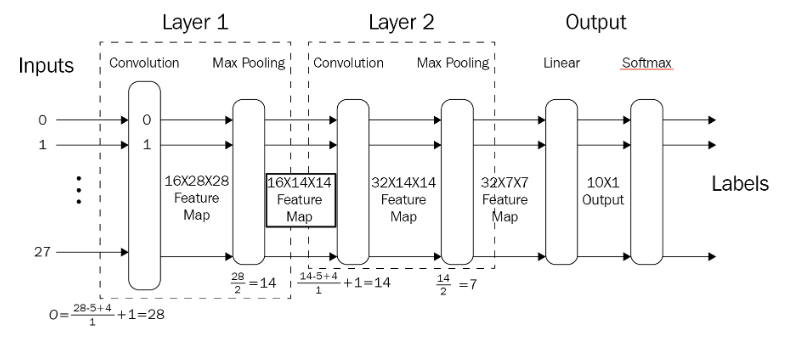

***Referencia: Julian, D. (2018). Deep Learning with PyTorch. Packt Publishing.***

A la vista del modelo anterior, es interesante hacer varios apuntes:

- El tamaño de salida de la primera capa convolucional, antes del max pooling, es el mismo que el tamaño de entrada, es decir, 28x28. 

- Dado que estamos usando 16 kernels (núcleos) o canales, generando 16 mapas de características, la entrada a la capa de max pooling es un tensor de dimensiones 16x28x28. 

- Una capa de max pooling, con un tamaño de kernel de 2, un stride de 2 y un relleno implícito predeterminado, implica que simplemente se divide el tamaño del mapa de características por 2 para calcular el tamaño máximo de salida de la agrupación. Esto nos da un tamaño de salida de 16x14x14, el cual a su vez es el tamaño de entrada a la segunda capa convolucional. 

- Una vez más, utilizando la fórmula de salida, podemos comprobar que la segunda capa convolucional, antes del max pooling, genera mapas de características de 14x14, del mismo tamaño que su entrada. 

- Dado que establecemos el número de kernels en 32, la entrada a la segunda capa de agrupación máxima es una matriz de 32x14x14. 

- La segunda capa de max pooling es idéntica a la primera, con el tamaño del kernel y el stride establecidos en 2 y el relleno implícito predeterminado. Una vez más, podemos simplemente dividir por 2 para calcular el tamaño de salida y, por lo tanto, la entrada a la capa de salida lineal. 

- Finalmente, es necesario aplanar esta matriz a una dimensión. Por tanto, el tamaño de entrada para la capa de salida lineal es una dimensión única de 32*7*7, o 1568. Como es habitual, se requiere que el tamaño de salida de la capa lineal final sea el número de clases, que en este caso es 10.

Podemos inspeccionar los parámetros del modelo para ver qué es exactamente lo que sucede si ejecutamos el siguiente código:

In [ ]:
parameters = list((model.parameters()))
for parameter in parameters:
    print(parameter.size())

Los parámetros del modelo vienen dados por seis tensores:
- El primer tensor se refiere a los parámetros de la primera capa de convolución. Consiste en 16 kernels, 1 dimensión de color y un kernel de tamaño 5. 
- El siguiente tensor es el bias y tiene una única dimensión de tamaño 16.
- El tercer tensor está compuesto por los 32 kernels de la segunda capa convolucional, los 16 canales de entrada, la profundidad y el kernel de tamaño 5x5. 
- En la capa lineal final, se aplanan estas dimensiones a 10x1568.

# Batch normalization

La normalización por lotes (batch normalization) se utiliza ampliamente para mejorar el rendimiento de las redes neuronales.

Funciona estabilizando las distribuciones de entrada de capa, lo que se logra ajustando la media y la varianza de estas entradas. 

Existe bastante incertidumbre entre la comunidad de investigadores acerca de por qué la normalización por lotes es tan efectiva. En un principio, se pensó que esto podía deberse a que reduce el llamado desplazamiento covariable interno (*internal covariate shift, ICS*), que se refiere al cambio en las distribuciones como resultado de las actualizaciones de los parámetros de las capas anteriores. La motivación original de la normalización de lotes era reducir este cambio. Sin embargo, no se ha encontrado de manera concluyente un vínculo claro entre ICS y rendimiento.

Investigaciones más recientes han demostrado que la normalización por lotes funciona suavizando el panorama de optimización. Básicamente, esto significa que el descenso de gradientes funciona de manera más eficiente. Se pueden encontrar detalles sobre esto en *¿Cómo ayuda la normalización por lotes a la optimización?* de Santuskar et al., que está disponible en https://arxiv.org/abs/1805.11604.

La normalización por lotes se encuentra implementada en la función nn.BatchNorml2d:

In [ ]:
class CNNModel3(nn.Module):
    def __init__(self):
        super(CNNModel3, self).__init__()
        self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size = 5, stride = 1, padding = 2),
        nn.BatchNorm2d(16),
        nn.ReLu(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size = 5, stride = 1, padding = 2),
        nn.BatchNorm2d(32),
        nn.ReLu(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        self.lin1 = nn.Linear(32*7*7, 10)
        
        def forward(self, x):
            out = self.layer1(x)
            out = self.layer2(out)
            out = out.view(out.size(0), -1)
            out = self.lin1(out)
            return out
        
cnn_model3 = CNNModel3()